# Study of a genetic switch model as a dynamical system

This exercise was generated from a Jupyter notebook. You can download the notebook [here](phase_portrait.ipynb).

In this tutorial, we will numerically explore a genetic switch model that's based on mutual repression of two molecules. We describe the dynamics of the concentrations of these two molecules ($R_1$ and $R_2$) via

\begin{align}
\frac{\mathrm{d} R_1}{\mathrm{d} t} &= -\gamma R_1 + \frac{r}{1 + (R_2 / K)^2}, \\
\frac{\mathrm{d} R_2}{\mathrm{d} t} &= -\gamma R_2 + \frac{r}{1 + (R_1 / K)^2}.
\end{align}

Here $\gamma$ is the degradation rate, $r$ is the basal production rate, and $K$ is the dissociation constant of repressor binding. All three quantities are assumed to be the same for both molecules for simplicity. The power of 2 accounts for the fact that two repressors are assumed to bind as a dimer.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Let's make our custom style
rc = {'lines.linewidth' : 3, 'axes.labelsize' : 13, 'xtick.labelsize' : 13, \
      'ytick.labelsize' : 13, 'axes.titlesize' : 16}
sns.set(rc = rc)

In [11]:
# Define the model parameters
r = 40 # Production rate in sec^-1
gamma = 0.1 # Degradation rate in sec^-1
K = 100 # Dissociation constant in nM

To better understand the switch-like behavior of the model, let's plot the nullclines of the genetic switch, which correspond to lines in the $(R_1,R_2)$ phase space on which at least one of the derivatives is zero. The nullcline equations are the steady state solutions of the dynamics equations above, namely,

\begin{align}
R_1^{\text{steady}} &= \frac{r/\gamma}{1 + (R_2 / K)^2}, \\
R_2^{\text{steady}} &= \frac{r/\gamma}{1 + (R_1 / K)^2)}.
\end{align}

Let's plot the nullclines.

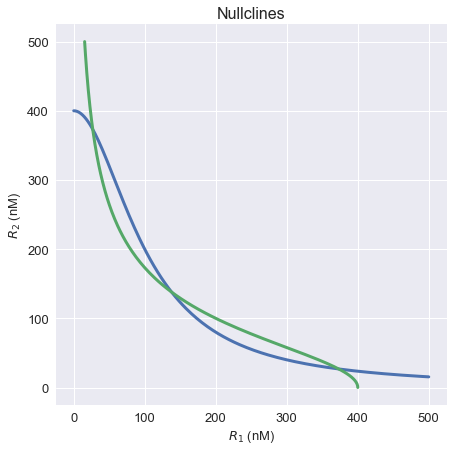

In [12]:
R_max = 500 # in M units
n_points= 200

# Range of values for plotting
R1_range = np.linspace(0, R_max, n_points)
R2_range = np.linspace(0, R_max, n_points)

# Steady state values
R1_steady = (r/gamma) / (1 + (R2_range/K)**2)
R2_steady = (r/gamma) / (1 + (R1_range/K)**2)

# Plot the nullclines
plt.figure(figsize = [7,7])
plt.plot(R1_range, R2_steady)
plt.plot(R1_steady, R2_range)
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')
plt.title('Nullclines')

As we can see, the two nullclines intersect at three different locations, corresponding to the steady-state of the system. We, however, cannot tell which of these three intersections correspond to stable and which to unstable steady-states. As a reminder, the system is in a stable steady state if it returns to it when slightly perturbed. On the other hand, if the system is in an unstable steady-state, it will diverge from it when slightly perturbed. To help us determine the types of the three steady states, we will draw a vector field of derivatives on top of the nullcline plot.

First, let's make a grid on which to evaluate the derivatives.

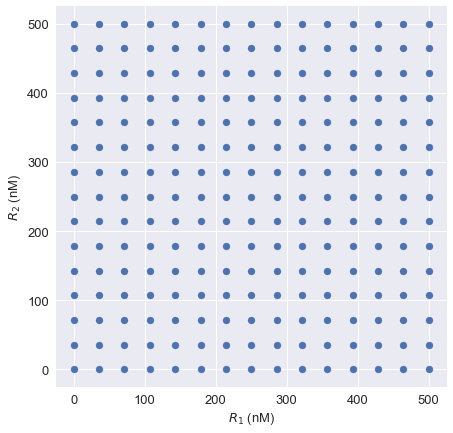

In [13]:
# Number of divisions per axis
n_divisions = 15

# List of coordinates for the vector plot
R1_vec_ls = np.linspace(0, R_max, n_divisions)
R2_vec_ls = np.linspace(0, R_max, n_divisions)

# Find all points on the grid
R1_mesh, R2_mesh = np.meshgrid(R1_vec_ls, R2_vec_ls)

# Show the poits where the vector field is going to be evaluated
plt.figure(figsize = [7,7])
plt.scatter(R1_mesh, R2_mesh)
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')

Great! Now, let's evaluate the derivatives at each of the mesh points and plot it on top of the nullcline figure.

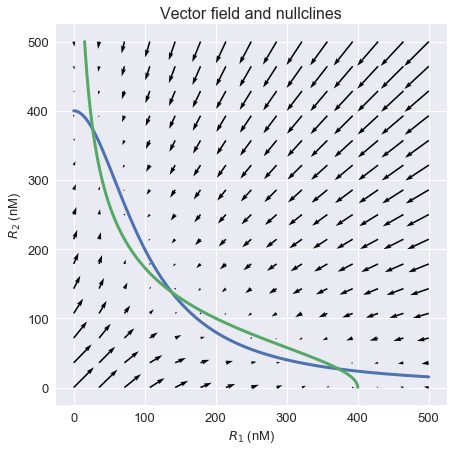

In [14]:
# Evaluate the derivatives at meshgrid points
dR1dt = -gamma * R1_mesh + r / (1 + (R2_mesh/K)**2)
dR2dt = -gamma * R2_mesh + r / (1 + (R1_mesh/K)**2)

plt.figure(figsize=[7,7])
plt.plot(R1_range, R2_steady) # Nullcline 1
plt.plot(R1_steady, R2_range) # Nullcline 2
plt.quiver(R1_mesh, R2_mesh, dR1dt, dR2dt) # Vector field
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')
plt.title('Vector field and nullclines')

Now it's obvious that the top left and the bottom right intersection points correspond to stable steady states, since the arrows in the neighborhood points towards them, while the intersection point in the middle is unstable because the arrows in the neighboring region point away from it.

To visually demonstrate the nature of stable and unstable steady state, we will initialize the dynamical system at 8 different locations in the phase space (i.e. 8 different values for the pair of molecule concentrations) and display the dynamics as the system approaches steady state.

Using matplotlib backend: MacOSX


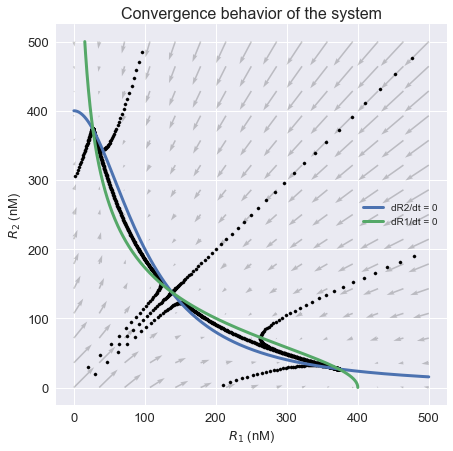

In [15]:
# Show the plot in a new window
%matplotlib

plt.figure(figsize=[7,7])
plt.plot(R1_range, R2_steady, label = 'dR2/dt = 0') # Nullcline 1
plt.plot(R1_steady, R2_range, label = 'dR1/dt = 0') # Nullcline 2
plt.legend()
plt.quiver(R1_mesh, R2_mesh, dR1dt, dR2dt, alpha = 0.2) # Add a transparent vector field
plt.xlabel('$R_1$ (nM)')
plt.ylabel('$R_2$ (nM)')
plt.title('Convergence behavior of the system')

# List of initial values
R1 = np.array([50, 500, 100, 200, 500, 10, 0,   0])
R2 = np.array([50, 500, 500,   0, 200, 0, 10, 300])

# Time step in sec
dt = 0.5

# Number of steps
n_steps = 300

for i in range(n_steps):
    
    # Increments for R1 and R2
    dR1 = (-gamma*R1 + r/(1 + (R2/K)**2)) * dt 
    dR2 = (-gamma*R2 + r/(1 + (R1/K)**2)) * dt
    
    # Update the R1 and R2 values
    R1 = R1 + dR1
    R2 = R2 + dR2
    
    # Plot the new position
    plt.scatter(R1, R2, color = 'black', s = 10)
    
    # Ask Python to pause at each step
    plt.pause(0.005)

Beautiful! Points initiated on the bottom half ended up at the stable steady state on the bottom. Similarly, points initiated on the top half ended up at the stable steady state on the top. Only in the case where the initial point was chosen exactly on the $R_1=R_2$ line did the system end up at the unstable steady state. This cannot happen in real systems, because slight fluctuations will eventually favor one of the stable steady states.